In [1]:
import pandas as pd

import seaborn as sns

In [10]:
user_data = pd.read_csv(pathway)

logs = pd.read_csv(pathway)

In [12]:
success_number = logs.query('success == True') \
                    .groupby('client', as_index=False) \
                    .agg({'platform': 'count'}) \
                    .rename(columns={'platform': 'success_number'}) \
                    .sort_values('success_number', ascending=False)

In [13]:
max_success = success_number.success_number.max()

In [14]:
# Clients with the most successful transactions

successful_clients = success_number.query('success_number == @max_success') \
                .sort_values('client') \
                .client \
                .tolist()

In [15]:
', '.join([str(client) for client in successful_clients]) # convert list into row

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [16]:
# Platform with the highest number of successful transactions

success_platform = logs.query('success == True') \
                    .groupby('platform', as_index=False) \
                    .agg({'client': 'count'}) \
                    .rename(columns={'client': 'success_platform'})

In [23]:
data = logs.merge(user_data, how='inner', on='client')

In [24]:
# The most popular platform among premium clients

data.query('premium == True') \
    .value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

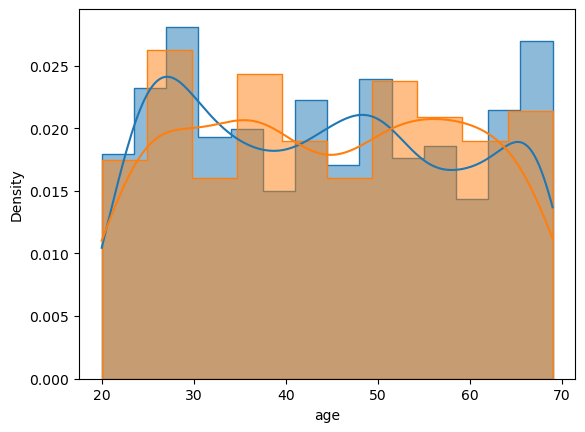

In [72]:
# Age distribution of clients depending on the type of client

sns.histplot(data.query('premium==False').age, kde=True, stat="density", element='step')
sns.histplot(data.query('premium==True').age, kde=True, stat="density", element='step')

In [83]:
client_vs_success_number = data.groupby('client') \
                                .agg({'success': 'sum'})

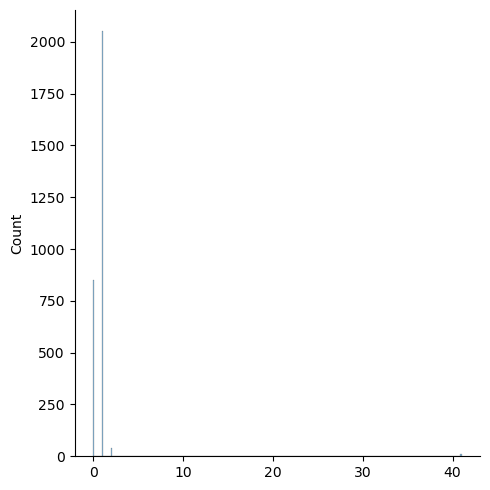

In [92]:
# Distribution of successful transactions

sns.displot(client_vs_success_number, legend=False)

In [109]:
computer_success = data.query('platform == "computer" and success == True')

<Axes: xlabel='age', ylabel='count'>

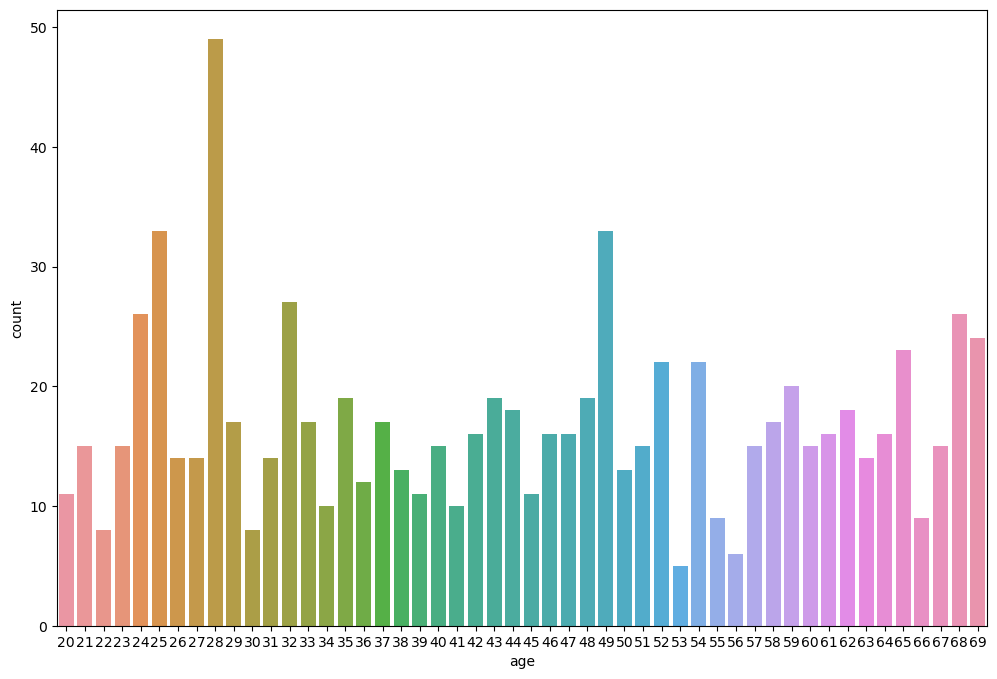

In [110]:
# The number of successful operations made on the computer platform, depending on age

plt.figure(figsize=(12, 8))
sns.countplot(x=computer_success['age'])